In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier

In [2]:
# Sample text data
sample = ['I will call you tonight', 'Please help me...', 'Please call a cab please !']

In [3]:
# Sample target vector
y = [0,1,0]              # 1st and 3rd to Inbox (Ham) and 2nd to Spam

In [4]:
model = CountVectorizer()

In [5]:
# Applying CountVectorizer Algorithm. We get Vocabulary
model.fit(sample)

CountVectorizer()

In [6]:
# Vocabulary
model.get_feature_names_out()

array(['cab', 'call', 'help', 'me', 'please', 'tonight', 'will', 'you'],
      dtype=object)

In [7]:
# Document-Term Matrix
model_dtm = model.transform(sample)
model_dtm

<3x8 sparse matrix of type '<class 'numpy.int64'>'
	with 10 stored elements in Compressed Sparse Row format>

In [8]:
model_dtm.toarray()

array([[0, 1, 0, 0, 0, 1, 1, 1],
       [0, 0, 1, 1, 1, 0, 0, 0],
       [1, 1, 0, 0, 2, 0, 0, 0]], dtype=int64)

In [9]:
pd.DataFrame(model_dtm.toarray(), columns=model.get_feature_names_out())

,cab,call,help,me,please,tonight,will,you
0,0,1,0,0,0,1,1,1
1,0,0,1,1,1,0,0,0
2,1,1,0,0,2,0,0,0


In [10]:
# Building KNN model to predict target
KNN = KNeighborsClassifier(n_neighbors=1)
KNN.fit(model_dtm,y)

KNeighborsClassifier(n_neighbors=1)

In [11]:
# Let's test the model
test_sample = ["Don't call please"]

In [12]:
# Creating DTM for test sample
test_dtm = model.transform(test_sample)
test_dtm.toarray()

array([[0, 1, 0, 0, 1, 0, 0, 0]], dtype=int64)

In [13]:
# Test this with KNN model
KNN.predict(test_dtm)    # We got 0 i.e., Ham SMS which goes into Inbox !!

array([0])

Working with Big Datasets

In [14]:
df = pd.read_table('sms.tsv', header=None, names=['labels','message'])
df.head()

,labels,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [15]:
df['labels_num'] = df['labels'].map({'ham':0, 'spam':1})

In [16]:
df.head()

,labels,message,labels_num
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [17]:
from sklearn.model_selection import train_test_split
X,y = df['message'],df['labels_num']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1) 

Creating DTM's for Training and Test Datasets

In [18]:
cv_model = CountVectorizer()
cv_model.fit(X)

CountVectorizer()

In [19]:
model_train_dtm = cv_model.transform(X_train)

In [20]:
model_test_dtm = cv_model.transform(X_test)

In [21]:
# Let's create a predicting model for this
from sklearn.naive_bayes import MultinomialNB
nb_model = MultinomialNB()
nb_model.fit(model_train_dtm, y_train)

MultinomialNB()

In [22]:
from sklearn import metrics
pred = nb_model.predict(model_test_dtm)
metrics.confusion_matrix(y_test,pred)

array([[1428,   14],
       [  13,  217]], dtype=int64)

In [23]:
metrics.accuracy_score(y_test,pred)

0.9838516746411483

Let's create another model and compare

1. Logistic Regression

In [24]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(model_train_dtm, y_train)

LogisticRegression()

In [25]:
pred2 = lr.predict(model_test_dtm)
metrics.confusion_matrix(y_test,pred)

array([[1428,   14],
       [  13,  217]], dtype=int64)

In [26]:
metrics.accuracy_score(y_test,pred)

0.9838516746411483

A look at parameters offered by CountVectorizer and TfidfVectorizer to fine tune the DTM

In [27]:
CountVectorizer().get_params()   # Parameters same for TfidfVectorizer

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.int64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': None,
 'min_df': 1,
 'ngram_range': (1, 1),
 'preprocessor': None,
 'stop_words': None,
 'strip_accents': None,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'vocabulary': None}

In [28]:
dummy = CountVectorizer()
dummy.fit(X_train)

CountVectorizer()

In [29]:
len(dummy.get_feature_names_out())

7155

In [30]:
# Let's remove stop words like a,an,the,I,he,she,it,they,me,in,on,by,with,of,and,but,because,although...
dummy = CountVectorizer(stop_words='english')
dummy.fit(X_train)
len(dummy.get_feature_names_out())   # Removed stop words, thereby decreasing features 

6904

In [31]:
# Two-words at a time features
dummy = CountVectorizer(ngram_range=(1,2))
dummy.fit(X_train)
len(dummy.get_feature_names_out())    # Not feasible, so many dimensions

38822

In [32]:
# Ignoring terms that appear in more than 75% of documents
dummy = CountVectorizer(max_df=0.75)
dummy.fit(X_train)
len(dummy.get_feature_names_out())

7155

In [33]:
# Keep terms that appear in atleast 5 documents
dummy = CountVectorizer(min_df=5)
dummy.fit(X_train)
len(dummy.get_feature_names_out())

1399

Word Cloud

In [34]:
from wordcloud import WordCloud

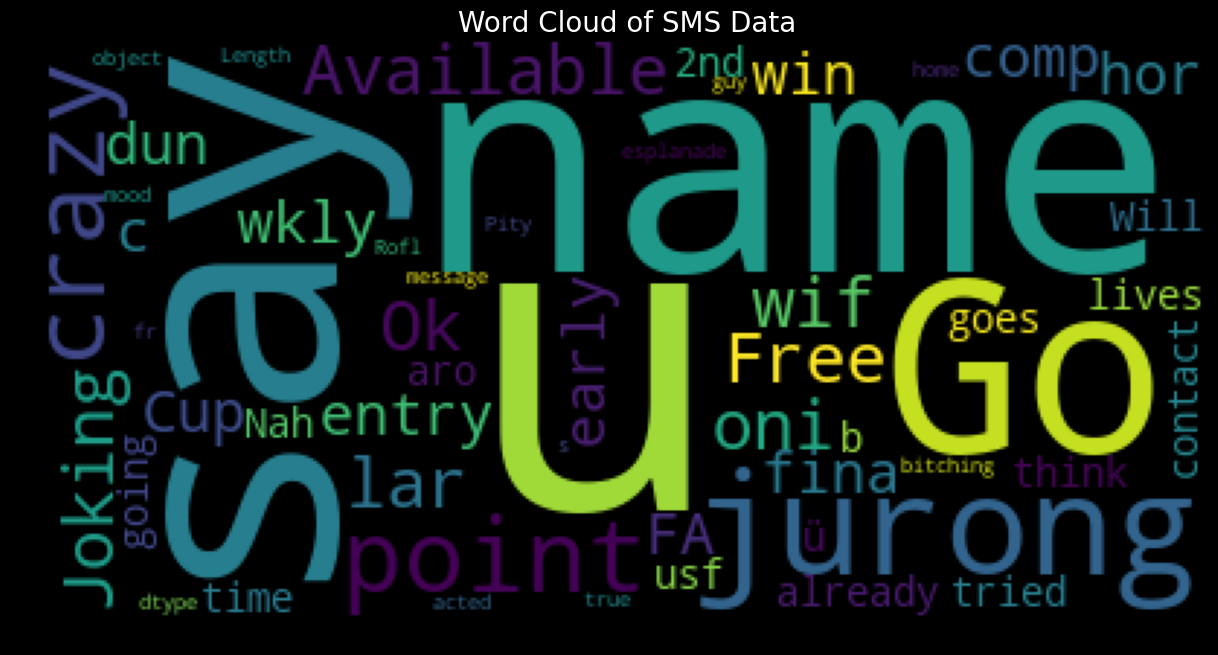

In [35]:
wc = WordCloud()
wc.generate(str(df['message']))
plt.figure(figsize=(15,15), facecolor='k')
plt.title('Word Cloud of SMS Data', fontsize=20, color='white')
plt.imshow(wc)
plt.show()